# Import thư viện và kết nối DB

In [ ]:
import pyodbc
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
server = '45.117.83.230'
database = 'DA_FINALTEST'
username = 'Student_DA_Q1'
password = '@MindXDream2023'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

db_table = 'dbo.CarPrice_Assignment'

In [ ]:
query = "SELECT * FROM " + db_table
df_root = pd.read_sql(query, cnxn)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4316\259024930.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_root = pd.read_sql(query, cnxn)


# Hiểu DB và Clean data

In [ ]:
df = df_root.copy()

In [ ]:
full_col = df.columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()
numerical_col = df.select_dtypes(exclude=['object']).columns.tolist()

## Thông tin db

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,886.0,...,130,mpfi,347.0,268.0,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,886.0,...,130,mpfi,347.0,268.0,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,945.0,...,152,mpfi,268.0,347.0,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,998.0,...,109,mpfi,319.0,34.0,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,994.0,...,136,mpfi,319.0,34.0,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,923.69,1597.50,616.19,491.20,2555.57,126.91,316.86,329.49,74.57,104.12,5125.12,25.22,30.75,102468.95
std,59.32,1.25,229.28,471.81,156.57,146.57,520.68,41.64,68.66,429.11,99.37,39.54,476.99,6.54,6.89,1246484.39
min,1.00,-2.00,93.00,150.00,64.00,51.00,1488.00,61.00,35.00,28.00,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,945.00,1624.00,638.00,508.00,2145.00,97.00,305.00,268.00,9.00,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,963.00,1724.00,654.00,541.00,2414.00,120.00,327.00,319.00,85.00,95.00,5200.00,24.00,30.00,10595.00
75%,154.00,2.00,1004.00,1803.00,665.00,555.00,2935.00,141.00,354.00,339.00,94.00,116.00,5500.00,30.00,34.00,16558.00
max,205.00,3.00,1209.00,2081.00,723.00,598.00,4066.00,326.00,394.00,3255.00,941.00,288.00,6600.00,49.00,54.00,17859167.00


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
for col in categorical_col[1:]:
    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Nhận xét:
Car_ID = 5, CarName = 'audi 100ls' là dữ liệu không chính xác vì dòng Xe Audi 100LS là xe cầu trước (fwd), không phải 4wd => Ta cần lưu ý các kết quả có liên quan đến dữ liệu này.

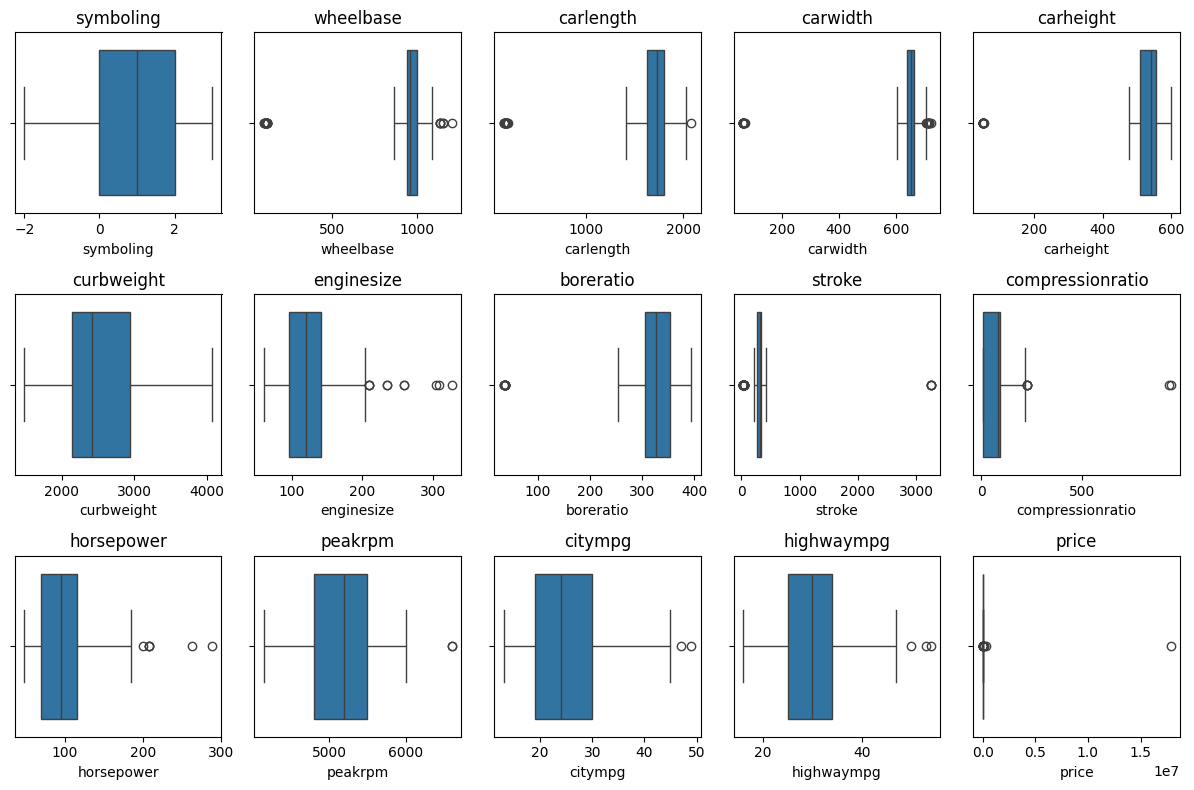

In [ ]:
tnumerical_col = numerical_col[1:]
plt.figure(figsize=(12, 8))
for feature in tnumerical_col:
    plt.subplot(3, 5, tnumerical_col.index(feature) + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

## Xử lý outlier ở wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio

In [ ]:
df.loc[df["wheelbase"] < 800, "wheelbase"] = df['wheelbase']*10

df.loc[df["carlength"] < 800, "carlength"] = df['carlength']*10
df.loc[df["carwidth"] < 600, "carwidth"] = df['carwidth']*10
df.loc[df["carheight"] < 400, "carheight"] = df['carheight']*10

df.loc[df["boreratio"] < 200, "boreratio"] = df['boreratio']*10

df.loc[df["stroke"] > 1000, "stroke"] = df['stroke']*0.1
df.loc[df["stroke"] < 200, "stroke"] = df['stroke']*10

df.loc[df["compressionratio"] > 500, "compressionratio"] = df['compressionratio']*0.1

## Xử lý outlier ở price

In [ ]:
# wheelbase, carlength, carwidth, carheight, boreratio, stroke, compressionratio
df[df['price']==df['price'].max()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,995.0,...,131,mpfi,313.0,340.0,7.0,160,5500,16,22,17859167.0


In [ ]:
# Mẫu audi 5000s giá không quá 20000 nên số 17859167 chính là 17859.167
df['price'] = df['price'].replace({17859167:17859.167})

<Axes: xlabel='price'>

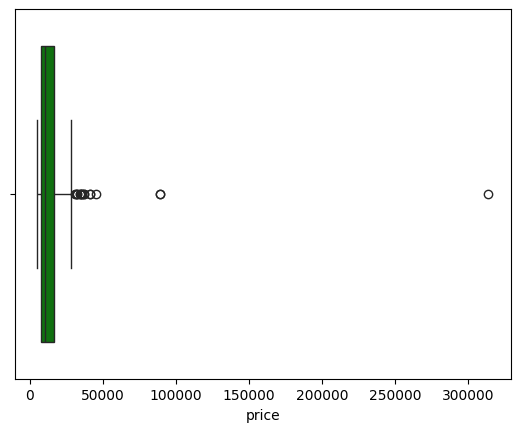

In [ ]:
sns.boxplot(x = df['price'],color="green")

In [ ]:
# 2 outlier còn lại có thể cũng sai số tương tự nên ta giảm xuống 1 hàng đơn vị
df.loc[df["price"] >= 50000, "price"] = df['price']*0.1

## Kết quả xử lý outlier

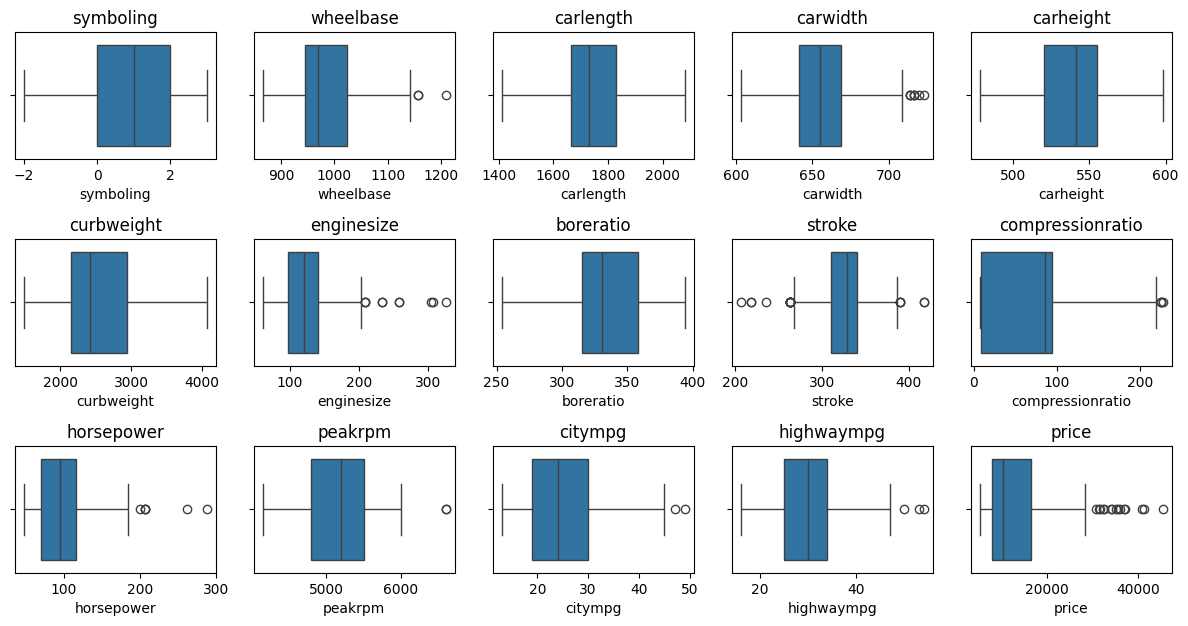

In [ ]:
plt.figure(figsize=(12, 8))
for feature in tnumerical_col:
    plt.subplot(4, 5, tnumerical_col.index(feature) + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

# EDA - Phân tích mô tả

In [ ]:
# car_ID không có nhiều tác dụng trong phân tích
numerical_col.remove('car_ID')

# categorical_col.remove('CarName')

## Tương quan các feature (Correlation)

In [ ]:
show_df_corr = df.corr(numeric_only=True)
show_df_corr

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.006902,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.106026,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.051335,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,-0.021575,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.050723,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,-0.049979,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,-0.027737,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,-0.036824,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,-0.020959,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.089375,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: >

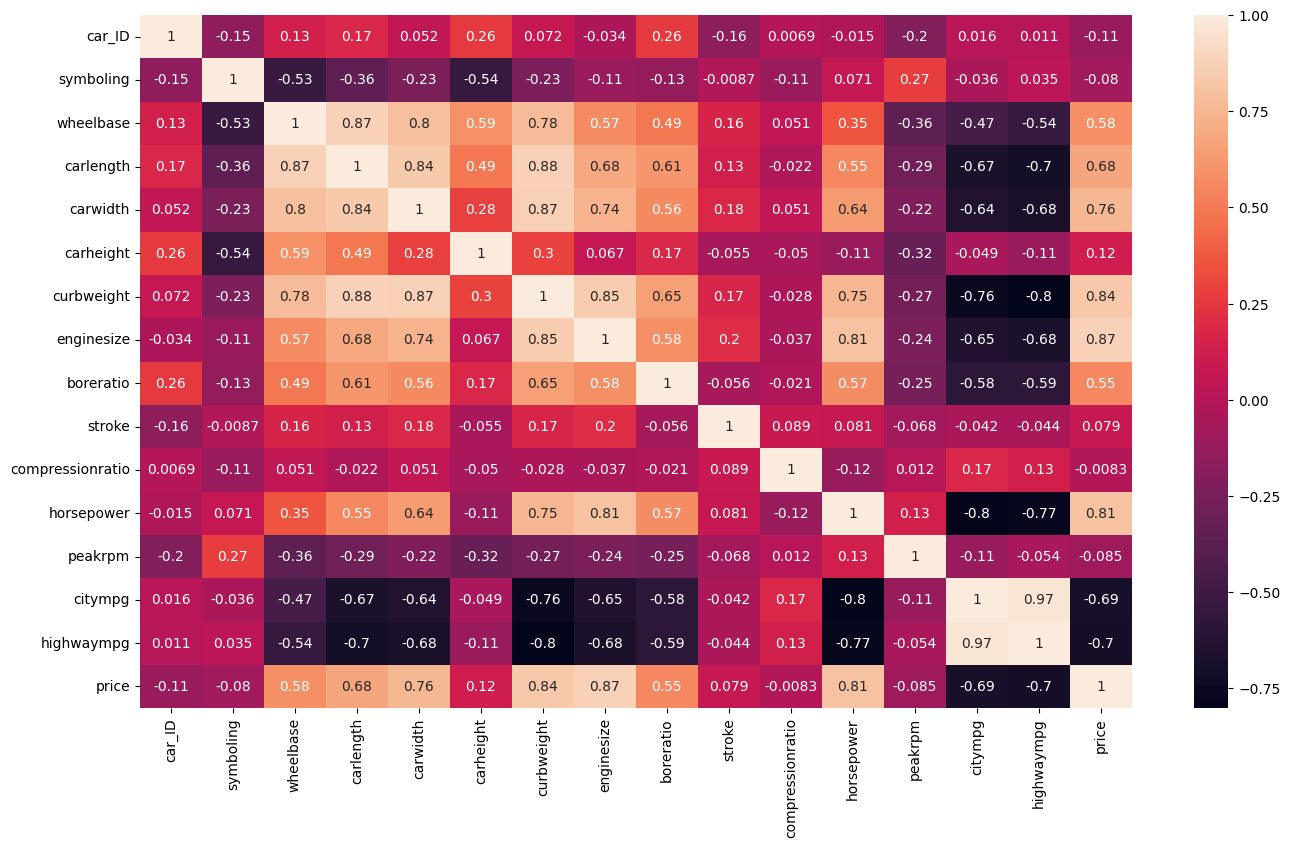

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(show_df_corr, annot=True)

In [ ]:
def correlation(df, threshold):
    coll_corr=set()
    corr_matrix=df.corr(numeric_only = True)
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr

In [ ]:
corr_feature = correlation(df,0.90)
print(corr_feature)

{'highwaympg'}


In [ ]:
# feature 'highwaympg' có tương quan cao, cân nhắc loại bỏ
numerical_col.remove('highwaympg')

## Phân tích mô tả theo các feature rời rạc - thương hiệu

In [ ]:
# thêm cột CarBrand
categorical_col.append('CarBrand')

df['CarBrand'] = df['CarName'].str.split(' ',n= 1,expand=True)[0]
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# replace các lỗi chính tả
df['CarBrand'] = df['CarBrand'].replace({
    'maxda': 'mazda',
    'nissan': 'Nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'})

In [ ]:
df_brand = pd.DataFrame(df['CarBrand'].value_counts()).reset_index().rename(columns={'CarBrand':'Car Brand','count': 'Count'})

df_brand_price = pd.DataFrame(df.groupby('CarBrand')['price'].mean()).reset_index().sort_values(by='price', ascending=False).rename(columns={'CarBrand':'Car Brand','price': 'Price'})

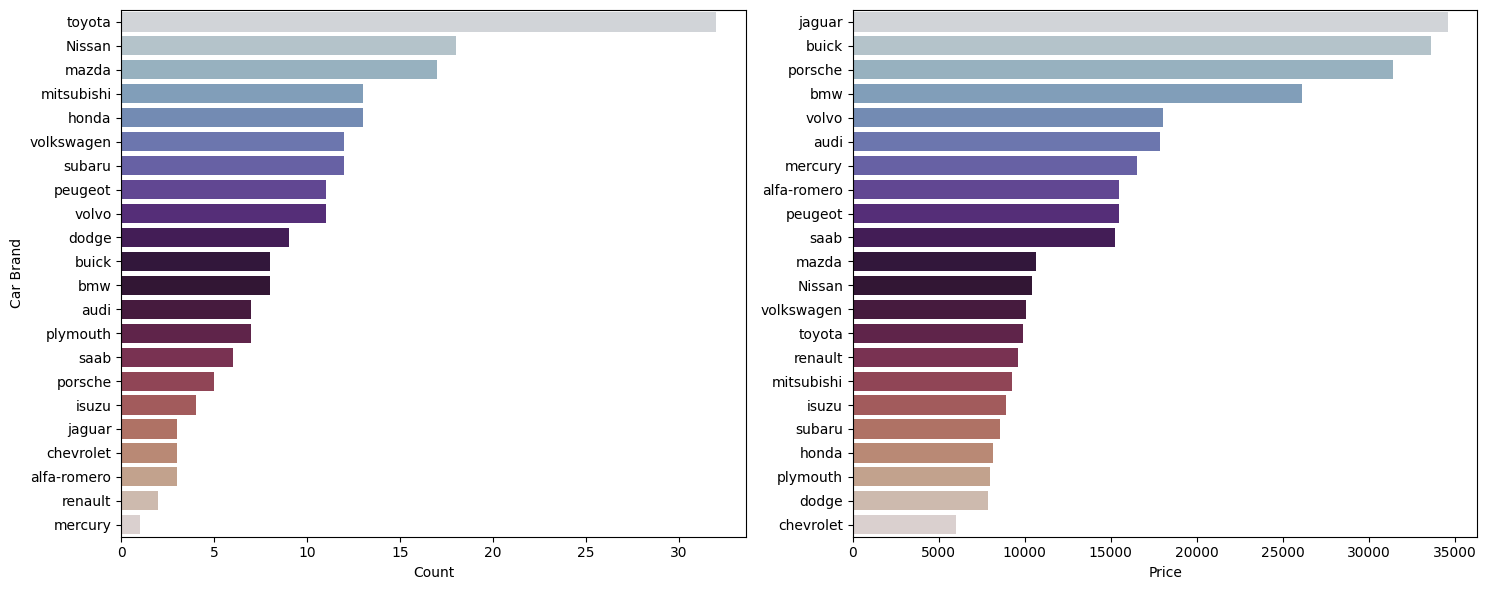

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot=sns.barplot(y='Car Brand', hue='Car Brand',x='Count',data=df_brand, palette = 'twilight', legend=False)
plt.setp(plot.get_xticklabels(), rotation=0)

plt.subplot(1, 2, 2)

plot=sns.barplot(y='Car Brand', hue='Car Brand',x='Price',data=df_brand_price, palette = 'twilight', legend=False)
plot=plt.setp(plot.get_xticklabels(), rotation=0)
plt.ylabel(None)
plt.tight_layout()
plt.show()

Nhận xét:
Với số lượng vượt trội, Toyota là hãng xe được ưa chuộng nhất, giá ở mức trung bình thấp (top 9 dưới lên).
Jaguar số lượng ít (top 5 dưới lên) do giá thành cao (giá cao nhất). Tương tự Mercury là hãng xe có số lượng ít nhất, giá tương đối cao (top 7).
Đặc biệt Chevrolet số lượng ít (top 4 dưới lên) dù giá thấp nhất.

## Phân tích mô tả theo các feature rời rạc - các feature khác

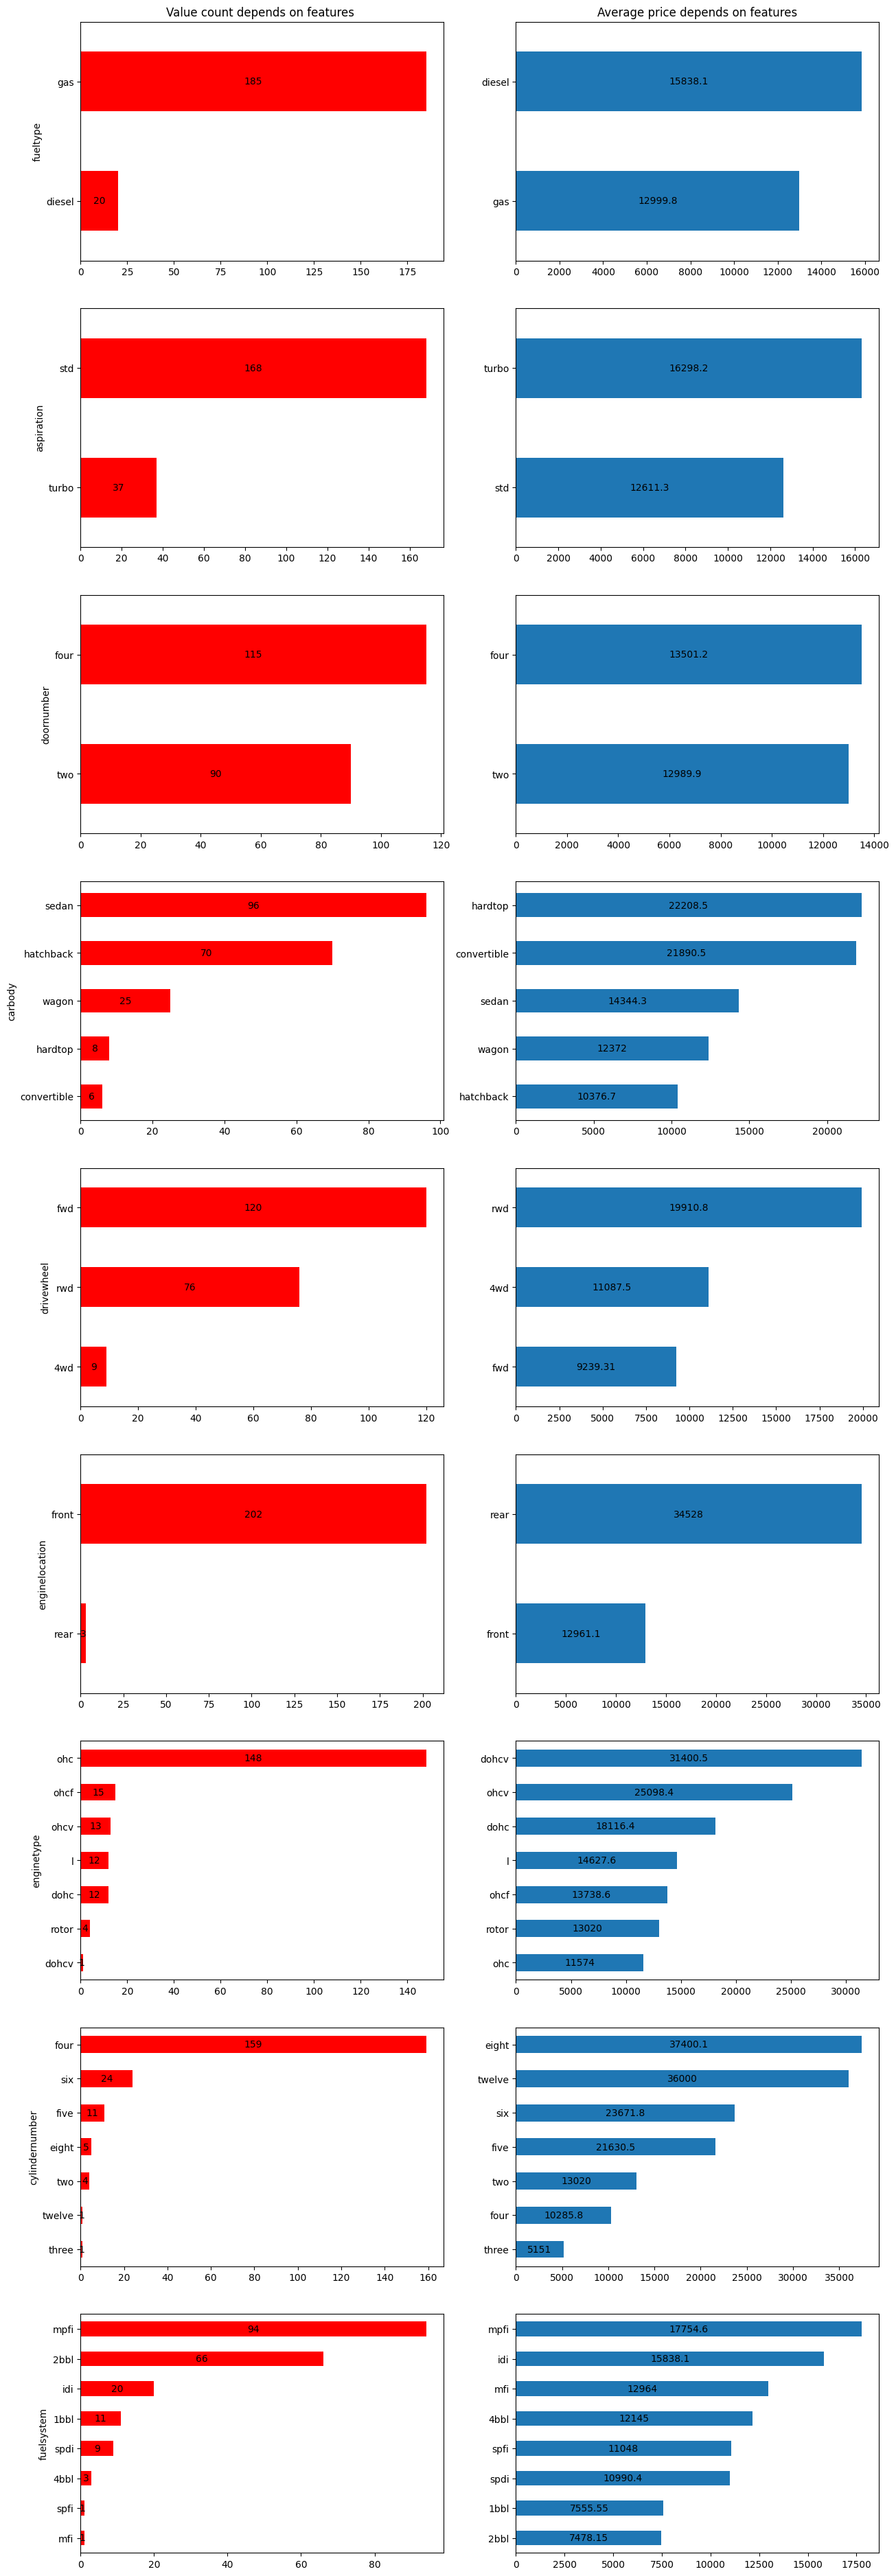

In [ ]:
i=1
plt.figure(figsize=(15,75))
for col in categorical_col[1:-1]:
    plt.subplot(14,2,i)
    ax=df[col].value_counts().sort_values().plot(kind='barh', color='r')
    ax.bar_label(ax.containers[0], label_type='center')
    plt.xticks(rotation=0)
    plt.ylabel(col)
    if i==1:
        plt.title('Value count depends on features ')

    i=i+1
    plt.subplot(14,2,i)
    bx=df.groupby(col)["price"].mean().sort_values().plot(kind='barh')
    bx.bar_label(bx.containers[0], label_type='center')
    plt.xticks(rotation=0)
    plt.ylabel(None)
    if i==2:
        plt.title('Average price depends on features')
    i=i+1

plt.show()

Nhận xét:
-fuel type: Hầu hết các mẫu xe sử dụng xăng (gas), chiếm khoảng 90% (185/205) số lượng và trung bình giá xe xăng thấp hơn 17.9% xe chạy Diesel (12999.8/15838.1)
-aspiration: Xe động cơ tiêu chuẩn (std) chiếm khoảng 82% số lượng, trung bình giá hiển nhiên thấp hơn Turbo.
-doornumber: Xe 4 cửa chiếm phần lớn (56%), trung bình giá của 2 loại tương đương nhau (chênh lệch giá khoảng 3.7%)
-carbody: Đa phần người dân sử dụng xe là loại Sedan, còn top trung bình giá cao là Convertible và Hardtop.
-drivewheel: Hầu hết đều là dẫn động cầu trước fwd, giá cũng thấp nhất. Tương tự với vị trí động cơ enginelocation và loại động cơ enginetype.
-cylindernumber: Số lượng xi-lanh tăng thì giá cũng tăng, dòng 4 xi-lanh có số lượng vượt trội nhất.
-fuelsystem: hệ thống nhiên liệu mpfi dẫn đầu về số lượng lẫn giá cả, còn 2bbl top 2 về số lượng là loại có giá thành rẻ nhất.

## Phân tích mô tả theo các feature liên tục

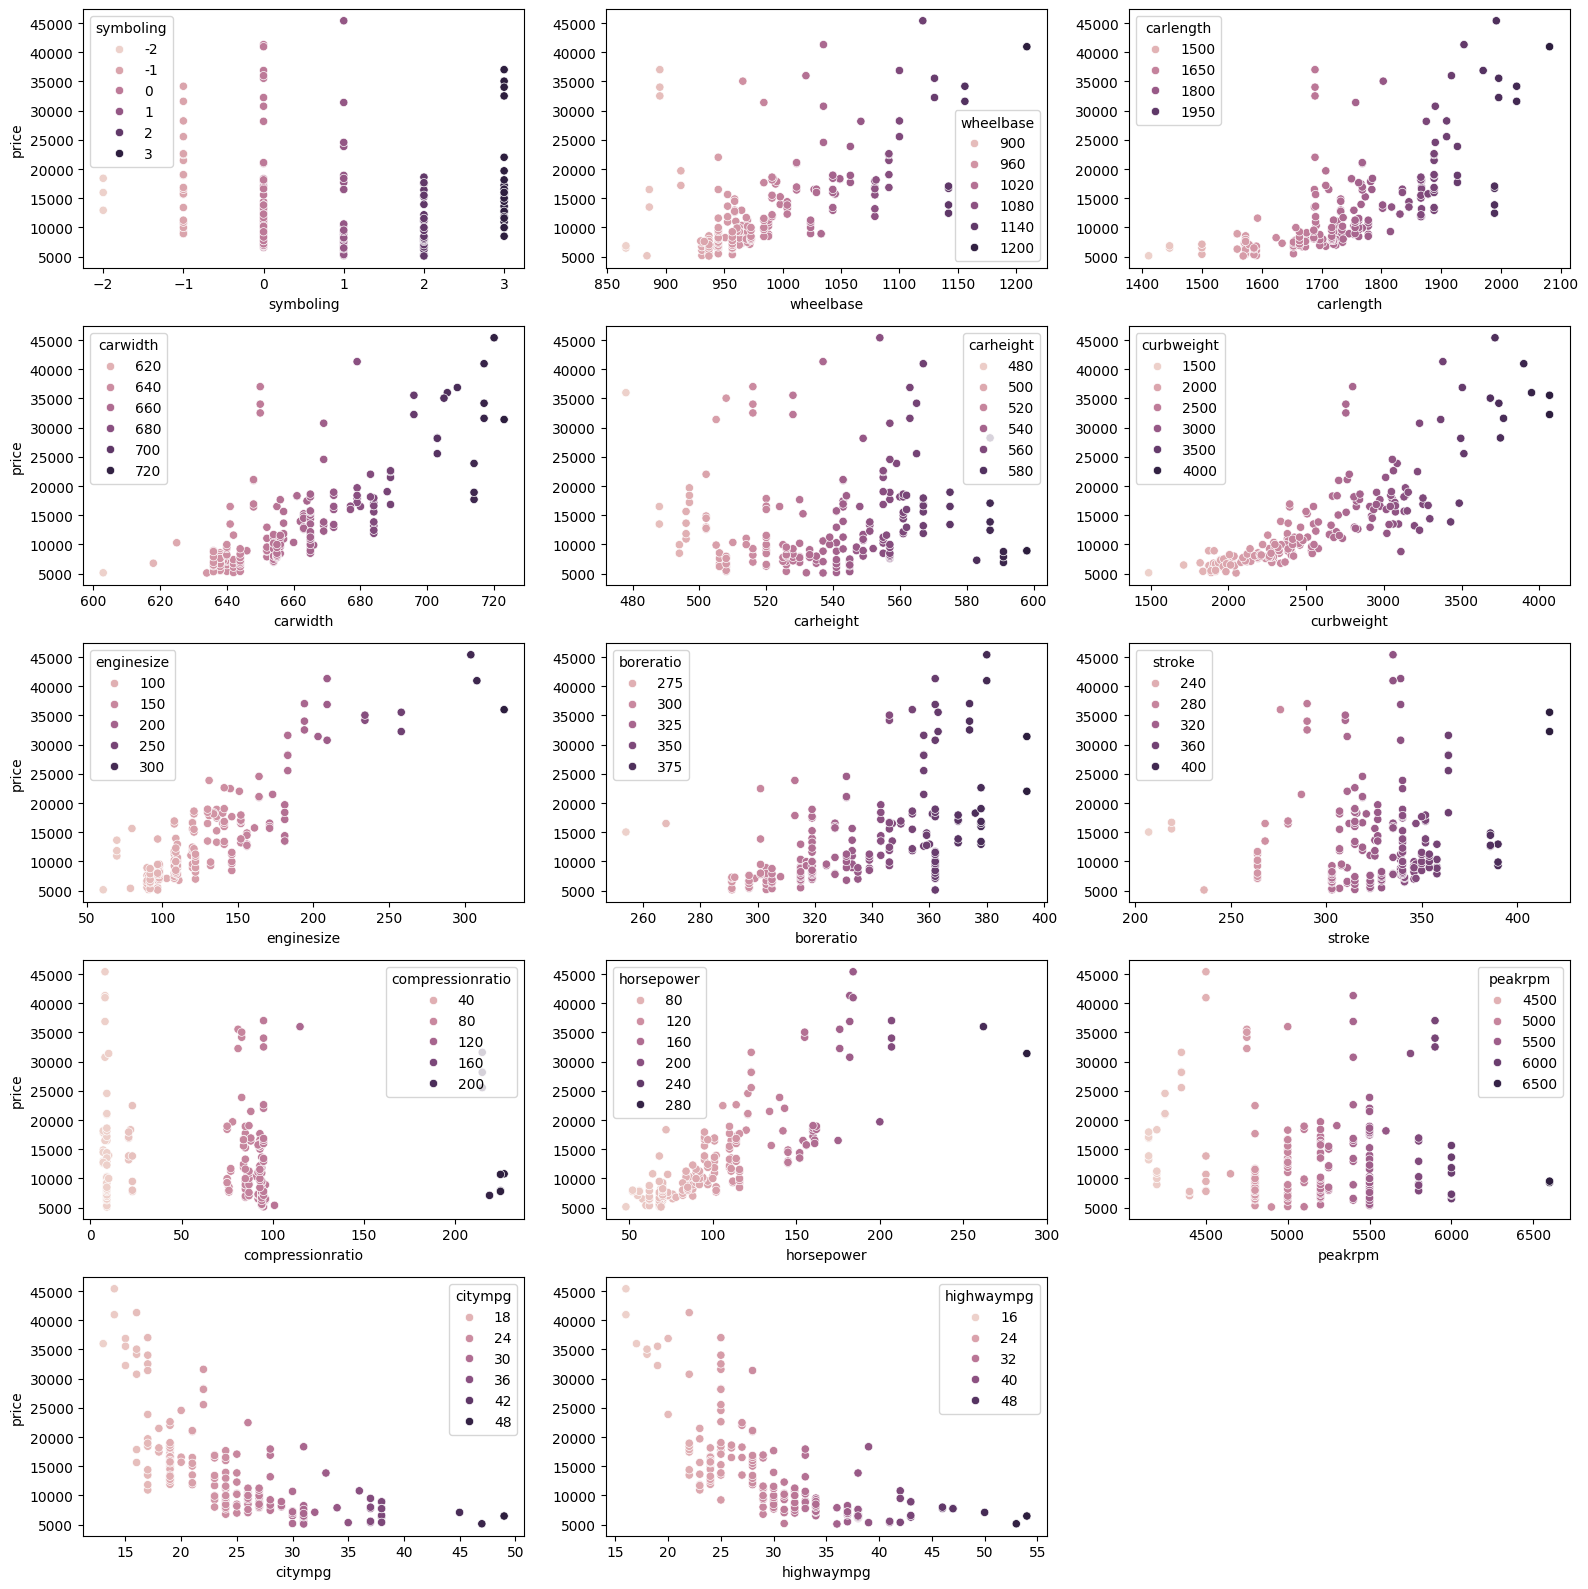

In [ ]:
plt.figure(figsize=(16, 16))
for feature in tnumerical_col[:-1]:
    plt.subplot(5, 3, tnumerical_col.index(feature) + 1)
    sns.scatterplot(data=df,x=feature,y="price",hue=feature,markers=True)
    if tnumerical_col.index(feature) % 3 != 0:
        plt.ylabel(None)
plt.tight_layout()
plt.show()

Nhận xét:
-wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower càng lớn thì giá càng cao. Và citympg càng thấp giá càng cao.
-carheight, stroke, compressionratio, peakrpm không phụ thuộc nhiều vào giá.

## Kết quả phân tích mô tả

Dataset đầu vào:
-205 hàng, 26 cột
-Không có giá trị null
-Không có giá trị trùng lặp
-Một số outlier do lỗi nhập liệu

Kết quả:
Giá xe trung bình = 13276
Giá tối thiểu = 5118
Giá tối đa = 45400

Các feature rời rạc:
Dòng xe có số lượng cao nhất: Toyota.
Hầu hết là xe xăng (gas), giá thấp hơn xe Diesel.
Xe có aspiration tiêu chuẩn (std) chiếm phần lớn, nguyên nhân là do giá rẻ. Tương tự với drivewheel, enginelocation và enginetype.
Xe 4 cửa chiếm ưu thế hơn một chút so với xe thể thao 2 cửa, trung bình giá của 2 loại tương đương nhau.
Đa phần là dáng Sedan ở mức giá trung bình, còn top giá là Convertible và Hardtop cũng là số lượng ít nhất.
Số lượng xi-lanh tăng thì giá cũng tăng, dòng 4 xi-lanh có số lượng vượt trội nhất.
Hệ thống nhiên liệu (fuelsystem) 'mpfi' dẫn đầu về số lượng lẫn giá cả, còn '2bbl' top 2 về số lượng là loại có giá thành rẻ nhất.
          
Các feature liên tục:
Khi tăng enginesize (kích thước động cơ) giá sẽ tăng.
wheelbase, carlength, carwidth (trục bánh xe, chiều dài, chiều rộng) có ảnh hưởng đến giá cả. Tương tự với curbweight, boreratio, horsepower, citympg
carheight (chiều cao xe) không ảnh hưởng gì. Tương tự với stroke, compressionratio, peakrpm

# Áp dụng model Machine Learning để phân tích

## Chọn feature bằng RFE (Recursive feature elimination, đệ quy) với Random Forest

In [ ]:
top_features = 10

In [ ]:
# Label encoding cho feature rời rạc
df_c = df[categorical_col].drop(['CarName','CarBrand'],axis=1)
df_c = df_c.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))

df_n = df[numerical_col].drop(['symboling','price'],axis=1)

In [ ]:
y = df['price']

In [ ]:
preX = pd.concat([df_c, df_n], axis=1)

In [ ]:
# rf_estimator = RandomForestRegressor()
rfe = RFE(estimator=rf_estimator, n_features_to_select=top_features, step=1)
rfe = rfe.fit(preX, y)
print('10 feature tốt nhất theo RFE:', preX.columns[rfe.support_])

10 feature tốt nhất theo RFE: Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg'],
      dtype='object')


In [ ]:
features = list(preX.columns[rfe.support_])

print(features)

['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']


## Chọn feature bằng Correlation

In [ ]:
df_n2 = df[tnumerical_col]
preX2 = pd.concat([df_c, df_n2], axis=1)

In [ ]:
preX2_s = preX2.corr()['price']
order = preX2_s.abs().sort_values(ascending=False)
preX2_s[order.index]

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
citympg            -0.685751
carlength           0.682920
drivewheel          0.577992
wheelbase           0.577816
boreratio           0.553173
fuelsystem          0.526823
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
fueltype           -0.105679
peakrpm            -0.085267
carbody            -0.083976
stroke              0.079443
enginetype          0.049171
doornumber         -0.031835
cylindernumber     -0.027628
compressionratio   -0.008252
Name: price, dtype: float64

In [ ]:
# Chỉ chọn các feature có tương quan cao với price
features2 = order.index.tolist()[1:top_features+1]

print(features2)

['enginesize', 'curbweight', 'horsepower', 'carwidth', 'citympg', 'carlength', 'drivewheel', 'wheelbase', 'boreratio', 'fuelsystem']


## Chia tệp

In [ ]:
X = preX[features]
# y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("Các feature được chọn bằng RFE")
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

Các feature được chọn bằng RFE
X Train :  (143, 10)
X Test  :  (62, 10)
Y Train :  (143,)
Y Test  :  (62,)


In [ ]:
X_ = preX[features2]
# y = df['price']

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.30, random_state=42)

print("Các feature được chọn bằng Correlation")
print("X Train : ", X_train_.shape)
print("X Test  : ", X_test_.shape)
print("Y Train : ", y_train_.shape)
print("Y Test  : ", y_test_.shape)

Các feature được chọn bằng Correlation
X Train :  (143, 10)
X Test  :  (62, 10)
Y Train :  (143,)
Y Test  :  (62,)


In [ ]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()

li = [LR,DTR,RFR,KNR]

## Trước khi dùng StandardScaler

In [ ]:
# Các feature theo RFE
d = {}
for i in li:
    i.fit(X_train,y_train)
    # y_train_pred = i.predict(X_train)
    y_test_pred = i.predict(X_test)
    print(i,":",r2_score(y_test,y_test_pred)*100)

    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 78.3125374508229
DecisionTreeRegressor() : 91.91835251130681
RandomForestRegressor() : 94.5061562126206
KNeighborsRegressor() : 77.01099742409927


In [ ]:
# Các feature theo Correlation
d_ = {}
for i in li:
    i.fit(X_train_,y_train_)
    y_test_pred = i.predict(X_test_)
    print(i,":",r2_score(y_test_,y_test_pred)*100)

    d_.update({str(i):i.score(X_test_,y_test_)*100})

LinearRegression() : 77.84281578327062
DecisionTreeRegressor() : 92.36222619823397
RandomForestRegressor() : 94.49721041417111
KNeighborsRegressor() : 72.72113304397986


In [ ]:
chart_df = pd.concat([pd.DataFrame(data = d, index=['RFE selected features']),
                     pd.DataFrame(data = d_, index=['Corr selected features'])]).transpose()
chart_df

,RFE selected features,Corr selected features
LinearRegression(),78.312537,77.842816
DecisionTreeRegressor(),91.918353,92.362226
RandomForestRegressor(),94.506156,94.497210
KNeighborsRegressor(),77.010997,72.721133


RFE selected features:  carlength, carwidth, citympg, compressionratio, curbweight, enginesize, horsepower, peakrpm, stroke, wheelbase
Corr selected features:  boreratio, carlength, carwidth, citympg, curbweight, drivewheel, enginesize, fuelsystem, horsepower, wheelbase


<Axes: title={'center': 'Algorithm vs Accuracy'}, xlabel='Algorithm', ylabel='Accuracy'>

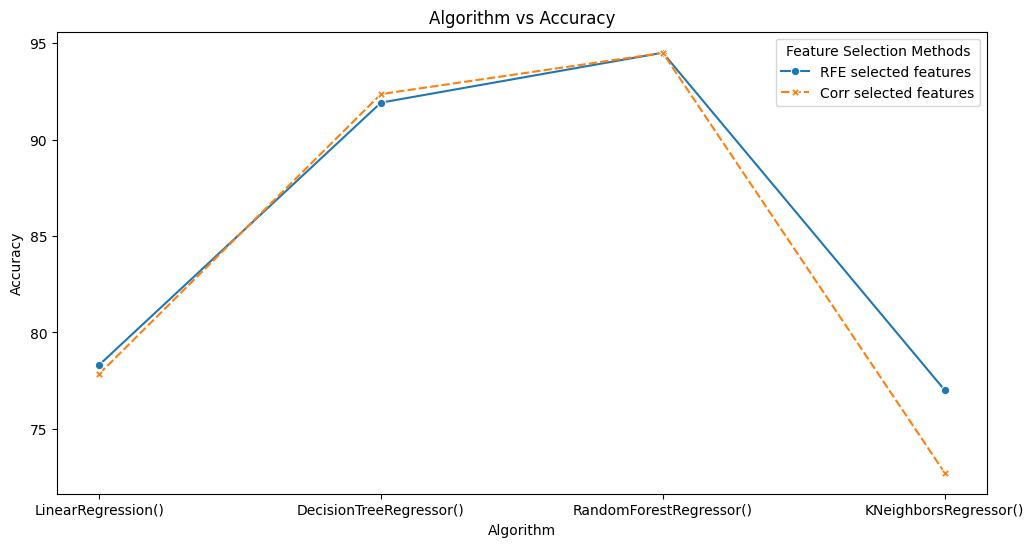

In [ ]:
chart_df.index.name='Models'
chart_df.columns.name='Feature Selection Methods'
print('RFE selected features: ', (', '.join(sorted(features))))
print('Corr selected features: ', (', '.join(sorted(features2))))

plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
sns.lineplot(data=chart_df, markers=True)

Nhận xét:
-Về mặt model ML: Model có độ chính xác cao nhất là Random Forest.
-Về mặt chọn lọc feature: RFE cho ra độ chính xác cao hơn với 3 model Linear Regression, K Neibors, Random Forest (~0.09%). Trong khi Correlation cho kết quả tốt hơn với Decision Tree.
=>Cân nhắc về model Random Forest và chọn lọc feature theo RFE.
(carlength, carwidth, citympg, compressionratio, curbweight, enginesize, horsepower, peakrpm, stroke, wheelbase)

### Test với feature chung của RFE và Correlation

In [ ]:
in_l = [value for value in features if value in features2]
print(len(in_l),'feature chung:',', '.join(in_l))

7 feature chung: carlength, carwidth, citympg, curbweight, enginesize, horsepower, wheelbase


In [ ]:
Z = preX[in_l]
# y = df['price']

Z_train, Z_test, t_train, t_test = train_test_split(Z, y, test_size=0.30, random_state=42)

print("Các feature chung:")
print("X Train : ", Z_train.shape)
print("X Test  : ", Z_test.shape)
print("Y Train : ", t_train.shape)
print("Y Test  : ", t_test.shape)

Các feature chung:
X Train :  (143, 7)
X Test  :  (62, 7)
Y Train :  (143,)
Y Test  :  (62,)


In [ ]:
# Các feature chung
d__ = {}
for i in li:
    i.fit(Z_train,t_train)
    y_test_pred = i.predict(Z_test)
    print(i,":",r2_score(t_test,y_test_pred)*100)

    d__.update({str(i):i.score(Z_test,t_test)*100})

LinearRegression() : 76.68613594529401
DecisionTreeRegressor() : 92.24650288923493
RandomForestRegressor() : 94.41225154665976
KNeighborsRegressor() : 73.13614084593681


Nhận xét: Kết quả bị giảm so với 1 trong 2 cách trên.
- Số feature ảnh hưởng nhiều đến giá xe là 10.
- 7 feature vẫn cho ra kết quả tương đối cao, có thể cân nhắc nếu mở rộng quy mô dự đoán (performance tốt hơn)

## Sau khi dùng Standard Scaler

In [ ]:
# Chuẩn hóa khi data có nhiều giá trị với đơn vị khác nhau
Scaler = StandardScaler()

In [ ]:
Xs = preX[features]
# y = df['price']

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(Xs, y, test_size=0.30, random_state=42)

print("Các feature được chọn bằng RFE")
print("X Train Scaler : ", X_train_s.shape)
print("X Test Scaler : ", X_test_s.shape)
print("Y Train Scaler : ", y_train_s.shape)
print("Y Test  Scaler : ", y_test_s.shape)

Các feature được chọn bằng RFE
X Train Scaler :  (143, 10)
X Test Scaler :  (62, 10)
Y Train Scaler :  (143,)
Y Test  Scaler :  (62,)


In [ ]:
X_train_s = Scaler.fit_transform(X_train_s)
X_train_s

array([[-0.42652147, -0.84478235, -0.64655303, ..., -0.26296022,
        -1.83937734, -1.6907718 ],
       [-0.42652147, -0.84478235, -0.64655303, ..., -0.26296022,
        -1.83937734, -1.6907718 ],
       [-0.23151305, -0.19056612, -0.95301169, ..., -0.26296022,
         0.68594616, -0.70859588],
       ...,
       [ 1.19854871,  1.39824472, -1.10624102, ...,  0.78785546,
        -1.23202105,  1.72187336],
       [ 1.19854871,  1.39824472,  0.11959362, ..., -0.68328649,
         0.46218332,  1.72187336],
       [ 1.19854871,  1.39824472, -0.95301169, ...,  0.57769233,
        -0.33696969,  1.72187336]])

In [ ]:
X_s = preX[features2]
# y = df['price']

In [ ]:
X_train_s_, X_test_s_, y_train_s_, y_test_s_ = train_test_split(X_s, y, test_size=0.30, random_state=42)

print("Các feature được chọn bằng Correlation")
print("X Train Scaler : ", X_train_s_.shape)
print("X Test Scaler : ", X_test_s_.shape)
print("Y Train Scaler : ", y_train_s_.shape)
print("Y Test  Scaler : ", y_test_s_.shape)

Các feature được chọn bằng Correlation
X Train Scaler :  (143, 10)
X Test Scaler :  (62, 10)
Y Train Scaler :  (143,)
Y Test  Scaler :  (62,)


In [ ]:
X_train_s_ = Scaler.fit_transform(X_train_s_)

In [ ]:
# Các feature theo RFE
ds = {}
for i in li:
    i.fit(X_train_s,y_train_s)
    y_test_pred = i.predict(X_test_s)
    print(i,":",r2_score(y_test_s,y_test_pred)*100)

    ds.update({str(i):i.score(X_test_s,y_test_s)*100})

LinearRegression() : 78.3125374508229
DecisionTreeRegressor() : 92.7255075875901
RandomForestRegressor() : 94.52077808617784
KNeighborsRegressor() : 72.80186137444002


In [ ]:
# Các feature theo Correlation
d_s = {}
for i in li:
    i.fit(X_train_s_,y_train_s_)
    y_test_pred = i.predict(X_test_s_)
    print(i,":",r2_score(y_test_s_,y_test_pred)*100)

    d_s.update({str(i):i.score(X_test_s_,y_test_s_)*100})

LinearRegression() : 77.84281578327065
DecisionTreeRegressor() : 92.07295378952055
RandomForestRegressor() : 94.29310264978892
KNeighborsRegressor() : 71.88498853684884


In [ ]:
chart_dfs = pd.concat([pd.DataFrame(data = ds, index=['RFE scaled']),
                     pd.DataFrame(data = d_s, index=['Corr scaled'])]).transpose()
chart_dfs

,RFE scaled,Corr scaled
LinearRegression(),78.312537,77.842816
DecisionTreeRegressor(),92.725508,92.072954
RandomForestRegressor(),94.520778,94.293103
KNeighborsRegressor(),72.801861,71.884989


<Axes: title={'center': 'Algorithm vs Accuracy'}, xlabel='Algorithm', ylabel='Accuracy'>

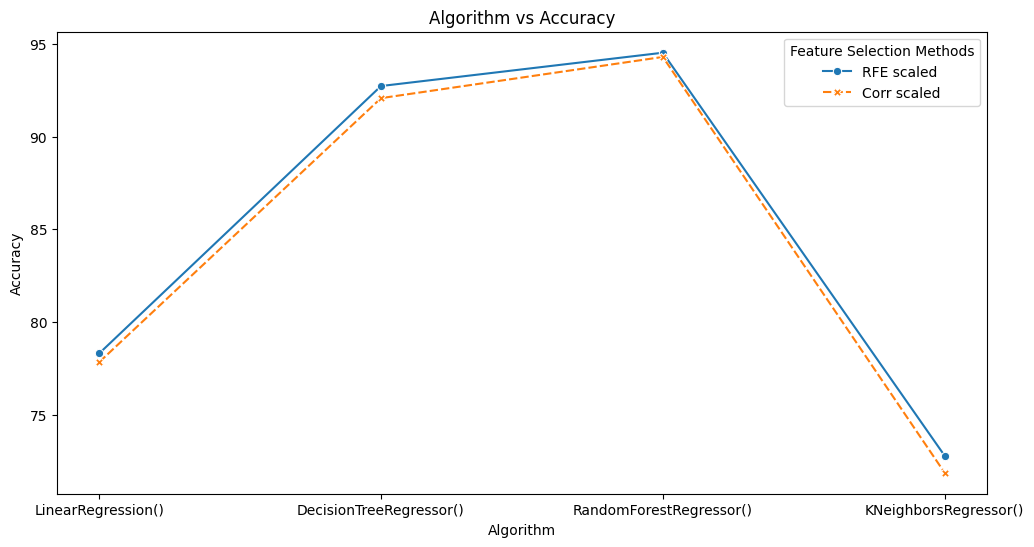

In [ ]:
chart_dfs.index.name='Models'
chart_dfs.columns.name='Feature Selection Methods'

plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
sns.lineplot(data=chart_dfs, markers=True)

In [ ]:
chart_all = pd.concat([pd.DataFrame(data=chart_df),pd.DataFrame(data=chart_dfs)], axis=1)
chart_all

,RFE selected features,Corr selected features,RFE scaled,Corr scaled
LinearRegression(),78.312537,77.842816,78.312537,77.842816
DecisionTreeRegressor(),91.918353,92.362226,92.725508,92.072954
RandomForestRegressor(),94.506156,94.497210,94.520778,94.293103
KNeighborsRegressor(),77.010997,72.721133,72.801861,71.884989


<Axes: title={'center': 'Algorithm vs Accuracy'}, xlabel='Algorithm', ylabel='Accuracy'>

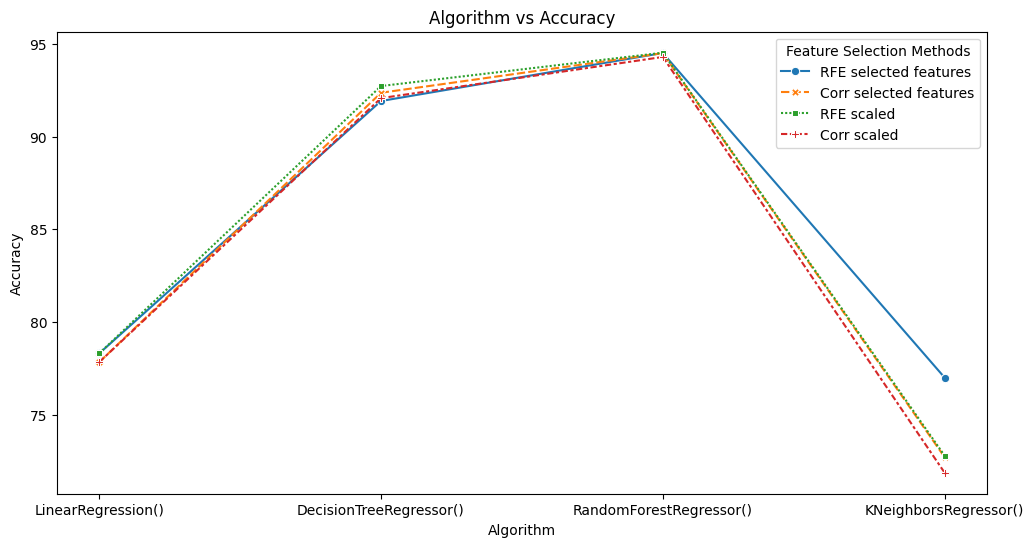

In [ ]:
chart_all.index.name='Models'
chart_all.columns.name='Feature Selection Methods'

plt.figure(figsize=(12, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
sns.lineplot(data=chart_all, markers=True)

Nhận xét: Sau khi chuẩn hóa (standardization bằng Standard Scaler)
-Random Forest và RFE features được cải thiện (+0.014%), vẫn là kết quả cao nhất.
-Kết quả ở model Random Forest, Decision Tree với RFE được cải thiện, trong khi với Corr thì giảm => Dữ liệu càng được chuẩn hóa thì sẽ càng đi thuận với RF do feature selection cũng là RF.
-Linear Regression kết quả không đổi. Nguyên nhân có thể do Standard Scaler không ảnh hưởng đến đồ thị tuyến tính của model này.
-K Neighbor giảm mạnh do việc chuẩn hóa ảnh hưởng thuật toán đo khoảng cách. Và K Neighbor model nổi tiếng trong các chủ đề classification hơn.

# Test với model tốt nhất: model RFE with RFE features

In [ ]:
# Model training
RFR.fit(X_train_s, y_train_s)

# Predictions
y_train_pred = RFR.predict(X_train_s)
y_test_pred = RFR.predict(X_test_s)

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test_s,'Predicted Value':y_test_pred})
def get_per(df):
    if df['Actual Value']>df['Predicted Value']: maxxx = df['Actual Value']
    else: maxxx = df['Predicted Value']
    return round(100*(1 - abs(df['Actual Value']-df['Predicted Value'])/maxxx),2)

pred_df['Accuracy']=pred_df.apply(get_per,axis=1)
pred_df.head()

,Actual Value,Predicted Value,Accuracy
15,30760.000,35933.900000,85.60
9,17859.167,18742.910000,95.28
100,9549.000,9401.480000,98.46
132,11850.000,13000.138333,91.15
68,28248.000,27736.780000,98.19
